In [1]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2024-05-12 14:51:08--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: 'pytorchcv.py.1'

     0K ......                                                100% 9.87M=0.001s

2024-05-12 14:51:09 (9.87 MB/s) - 'pytorchcv.py.1' saved [6540/6540]



In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128)

In [18]:
class OneConv(nn.Module):
    def __init__(self):
        super(OneConv, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=9, kernel_size=(5, 5))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(5184, 10)
        # 28 * 28 * 9  of 5, 5 = 9 * 24 * 24 = 5184 layers
        # 10 is the output classes obtained
    def forward(self, x):
        x = nn.functional.relu(self.conv(x))
        x = self.flatten(x)
        x = nn.functional.log_softmax(self.fc(x), dim = 1)
        return x
net = OneConv()
summary(net,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
OneConv                                  [1, 10]                   --
├─Conv2d: 1-1                            [1, 9, 24, 24]            234
├─Flatten: 1-2                           [1, 5184]                 --
├─Linear: 1-3                            [1, 10]                   51,850
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
Total mult-adds (M): 0.19
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.21
Estimated Total Size (MB): 0.25

Epoch  0, Train acc=0.935, Val acc=0.963, Train loss=0.002, Val loss=0.001
Epoch  1, Train acc=0.977, Val acc=0.973, Train loss=0.001, Val loss=0.001
Epoch  2, Train acc=0.985, Val acc=0.978, Train loss=0.000, Val loss=0.001
Epoch  3, Train acc=0.987, Val acc=0.974, Train loss=0.000, Val loss=0.001
Epoch  4, Train acc=0.987, Val acc=0.974, Train loss=0.000, Val loss=0.001


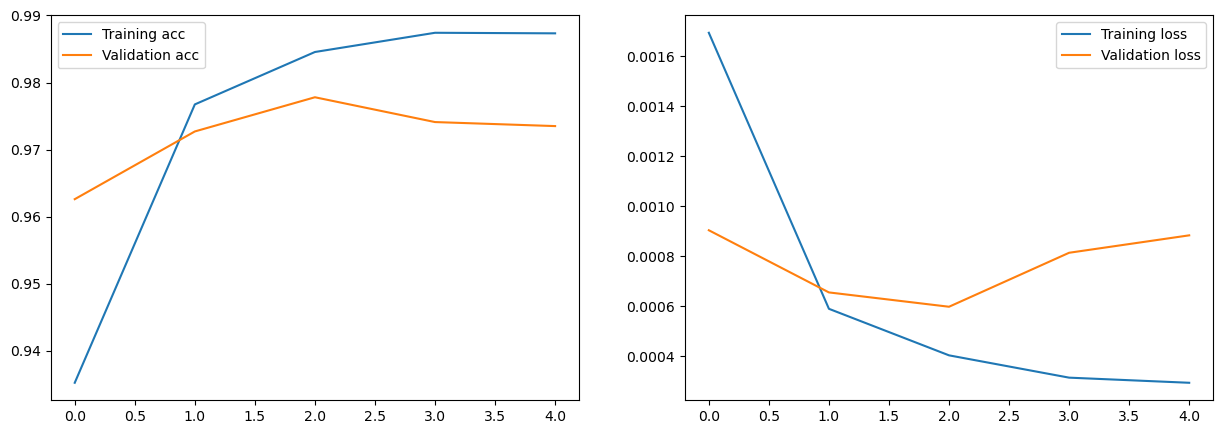

In [19]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

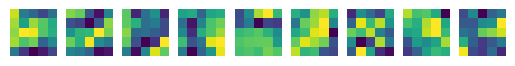

In [20]:
fig,ax = plt.subplots(1,9)
with torch.no_grad():
    p = next(net.conv.parameters())
    for i,x in enumerate(p):
        ax[i].imshow(x.detach().cpu()[0,...])
        ax[i].axis('off')